In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/anaconda3/lib/python3.8/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df.drop(["koi_disposition"], axis =1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
koi_used = df["koi_disposition"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, koi_used, random_state=1)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model - Random Forest



In [11]:
# Using Logistic Regression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)

In [12]:
# Fit the model
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9118993135011442

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
print(param_grid)

{'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}


In [27]:
# Train the model with GridSe
# instantiate the grid
grid = GridSearchCV(rf, param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the model using the grid search estimator. 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [28]:
# List the best parameters for this dataset
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
0.8773583525773944
RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500)


In [29]:
# Testing model
model3 = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)
model3.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

In [30]:
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Testing Data Score: 0.8724256292906178


# Feature Selection with Recursive Feature Elimination (RFE)


In [31]:
# Use feature importances to get the insignificant variables
importances = model3.feature_importances_
print(importances)

[0.09733095 0.12419812 0.01085879 0.00867146 0.14693806 0.03886691
 0.04499815 0.00455999 0.06636447 0.01557822 0.04297504 0.00386235
 0.00684527 0.02985256 0.0465294  0.05613145 0.01062261 0.02744314
 0.0199219  0.02092856 0.04707409 0.01520343 0.02278261 0.02071952
 0.00397291 0.02446805 0.00897379 0.00444654 0.0128009  0.00381616
 0.00288801 0.00567689 0.00369971]


In [32]:
# Sort the features with the most important ones on the top
feature_names = df.columns
feature_importance = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
feature_importance

[(0.10157546126560142, 'koi_fpflag_ss'),
 (0.09334130980680513, 'koi_disposition'),
 (0.07334990127628839, 'koi_fpflag_nt'),
 (0.057751818953553136, 'koi_insol_err2'),
 (0.05044281156410139, 'koi_depth_err2'),
 (0.03785069196378587, 'koi_fpflag_co'),
 (0.03475751634711405, 'koi_prad_err1'),
 (0.03246432750500923, 'koi_duration_err1'),
 (0.029976355268811247, 'koi_steff'),
 (0.029550501673854708, 'koi_prad'),
 (0.028939013716704466, 'koi_duration'),
 (0.028810605838733315, 'koi_steff_err1'),
 (0.023397691391061567, 'koi_impact_err2'),
 (0.022920726155109764, 'koi_time0bk'),
 (0.022912273010425182, 'koi_time0bk_err1'),
 (0.022471533257141685, 'koi_duration_err2'),
 (0.02111686261437659, 'koi_fpflag_ec'),
 (0.018898398111431167, 'koi_insol'),
 (0.01812574135588938, 'koi_time0bk_err2'),
 (0.0169524943627537, 'koi_insol_err1'),
 (0.01645482103873563, 'koi_period_err1'),
 (0.01616681726198128, 'koi_prad_err2'),
 (0.01593059516621205, 'koi_teq'),
 (0.015008181149087321, 'koi_period'),
 (0.014

In [33]:
# Get a new list of features with importance > 0.01
fi_selected_features = []
for importance in feature_importance:
    if importance[0] > 0.01:
        fi_selected_features.append(importance[1])

print(fi_selected_features)

['koi_fpflag_ss', 'koi_disposition', 'koi_fpflag_nt', 'koi_insol_err2', 'koi_depth_err2', 'koi_fpflag_co', 'koi_prad_err1', 'koi_duration_err1', 'koi_steff', 'koi_prad', 'koi_duration', 'koi_steff_err1', 'koi_impact_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_duration_err2', 'koi_fpflag_ec', 'koi_insol', 'koi_time0bk_err2', 'koi_insol_err1', 'koi_period_err1', 'koi_prad_err2', 'koi_teq', 'koi_period', 'koi_period_err2', 'koi_srad_err2', 'koi_depth', 'koi_depth_err1', 'koi_srad', 'koi_impact', 'ra', 'dec', 'koi_impact_err1', 'koi_slogg_err1']


In [34]:
# Get a new df with selected features
new_selected_features = df[fi_selected_features].drop(["koi_disposition"], axis=1)

# Re split the samples
X_train, X_test, y_train, y_test = train_test_split(new_selected_features, koi_used, random_state=42)

X_train.head()


,koi_fpflag_ss,koi_fpflag_nt,koi_insol_err2,koi_depth_err2,koi_fpflag_co,koi_prad_err1,koi_duration_err1,koi_steff,koi_prad,koi_duration,...,koi_period_err2,koi_srad_err2,koi_depth,koi_depth_err1,koi_srad,koi_impact,ra,dec,koi_impact_err1,koi_slogg_err1
6122,0,0,-103.87,-13.2,0,0.34,0.3060,5737,1.24,3.61600,...,-7.380000e-05,-0.207,123.1,13.2,1.125,0.150,294.40472,39.351681,0.305,0.153
6370,1,0,-677.78,-9.3,0,0.23,0.2820,5855,0.86,2.30900,...,-6.060000e-06,-0.056,114.6,9.3,0.797,0.291,284.50391,42.463860,0.193,0.033
2879,0,1,-64.34,-42.9,0,0.97,0.0000,6328,3.21,79.89690,...,-6.540000e-05,-0.097,641.1,42.9,0.963,0.970,295.50211,38.983540,0.879,0.050
107,0,0,-10.12,-25.3,0,0.07,0.0595,4768,2.25,2.63120,...,-1.910000e-05,-0.049,875.4,25.3,0.779,0.300,291.15878,40.750271,0.145,0.056
29,0,0,-93.21,-20.0,0,1.96,0.0075,5712,12.21,2.22739,...,-5.150000e-07,-0.130,9802.0,20.0,1.082,0.831,292.16705,48.727589,0.016,0.110


In [35]:
# Scale the data
X_scaler = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Testing model
fi_model3 = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)
fi_model3.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

In [37]:
print(f"Training Data Score: {fi_model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {fi_model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.8985313751668892
Testing Data Score: 0.8758581235697941


# Visualization of FI

<AxesSubplot:title={'center':'Feature Importances of 33 Features using RandomForestClassifier'}, xlabel='relative importance'>

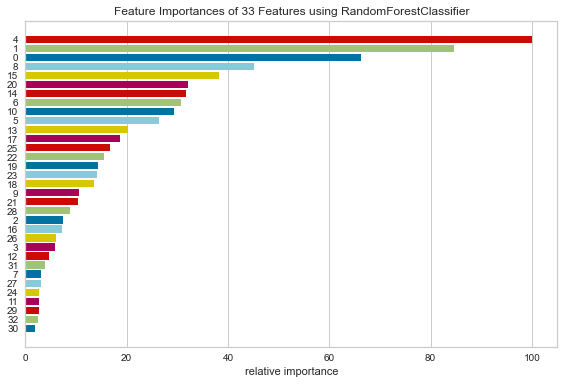

In [45]:

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model3)
viz.fit(X_train_scaled, y_train)
viz.show(outpath="image/model3_randomforest_featuresimportances.png")

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

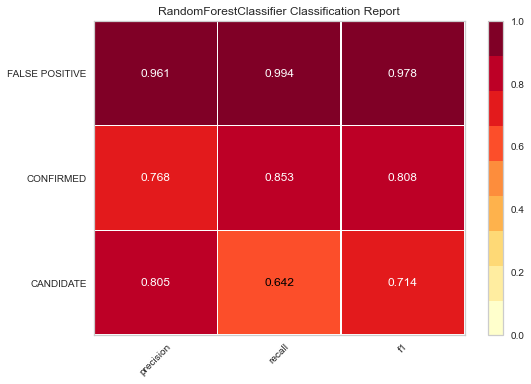

In [44]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model3)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show(outpath="image/model3_randomforest_report.png")

# Save the Model

In [46]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_rf.sav'
joblib.dump(model3, filename)

['model_rf.sav']